# Lab 3b: Graphs II

Lab associated with Module 3b: Graphs II

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np

In [3]:
import math

In [4]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

In [5]:
# Import timer for efficency comparisons
from time import process_time

### Section 1: Graph Preliminaries

Let us start by implementing our Node and Graph data structure to incorporate weights in the graph

In [6]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.estD = np.inf
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        
        return False
    
    def hasNeighbor(self, v):
        
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        
        return False
    
    def getOutNeighbors(self):
        
        return self.outNeighbors
    
    def getInNeighbors(self):
        
        return self.inNeighbors
    
    def getOutNeighborsWithWeights(self):
        
        return self.outNeighbors
    
    def getInNeighborsWithWeights(self):
        
        return self.inNeighbors
    
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
    
    def addOutNeighbor(self,v,wt):
        
        self.outNeighbors.append((v,wt))
    
    def addInNeighbor(self,v,wt):
        
        self.inNeighbors.append((v,wt))
        
        
    def __str__(self):
        
        return str(self.value) 

In [7]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []
    
    #def init_adj_matrix(self):
    #    self.adjMatrix = 

    def addVertex(self,n):
        n.idx = len(self.vertices)
        self.vertices.append(n)
        
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
        
    def addDiEdge(self, u, v, wt = 1):
        
        u.addOutNeighbor(v, wt = wt)
        v.addInNeighbor(u, wt = wt)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v, wt = 1):
        
        self.addDiEdge(u, v, wt = wt)
        self.addDiEdge(v, u, wt = wt)
        
            
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

Now that we have incorporated the weights, let us devise a plan to generate the graph

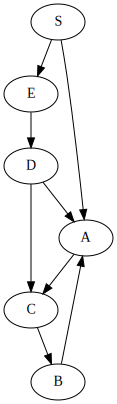

In [8]:
dot = Digraph()

dot.edge('S', 'E')
dot.edge('S', 'A')
dot.edge('E', 'D')
dot.edge('D', 'A')
dot.edge('A', 'C')
dot.edge('B', 'A')
dot.edge('D', 'C')
dot.edge('C', 'B')


#dot.view()
dot

In [9]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G.addVertex( Node(i) )

In [10]:
V = G.vertices
'''
#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], 4)

#dot.edge('A', 'C')
G.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
#G.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G.addDiEdge( V[3], V[5], 1)

#dot.edge('C', 'B')
G.addDiEdge( V[5], V[4], 2 )


#'''
V = G.vertices

#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], -4)

#dot.edge('A', 'C')
G.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G.addDiEdge( V[3], V[5], -1)

#dot.edge('C', 'B')
G.addDiEdge( V[5], V[4], -2 )
#'''

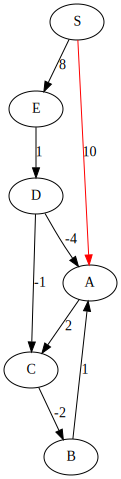

In [11]:
# Before anything else will setup some stuff <1>
global display_graph
# NOW WITH COLORS
def display_graph(G, node_cols = {}):
    V = G.vertices
    dot = Digraph()
    #print(G)
    for a,b in G.getDirEdges():
        val = str(a)
        if val in node_cols:
            if node_cols[val][0] == str(b[0]):
                dot.edge(val,str(b[0]),color=node_cols[val][1], label=str(b[1]))
            else:
                dot.edge(val,str(b[0]), label=str(b[1]))
        else:
            dot.edge(val,str(b[0]), label=str(b[1]))
    # --
    return dot
# --


display_graph(G,{'S':['A',"red"]})


Second Example

In [12]:
#'''
G2 = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'A', 'B']:
    G2.addVertex( Node(i) )
    
V2 = G2.vertices

G2.addDiEdge( V2[0], V2[1], 3)

G2.addDiEdge( V2[0], V2[2] , 4)

G2.addDiEdge( V2[2], V2[1], -2)
#'''

Graph with:
	 Vertices:
	S,A,B,
	 Edges:
	(S,(<__main__.Node object at 0x00000220EE693220>, 3)) (S,(<__main__.Node object at 0x00000220EE6A4B20>, 4)) (B,(<__main__.Node object at 0x00000220EE693220>, -2)) 



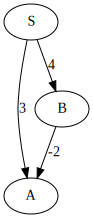

In [13]:
print(G2)
display_graph(G2)

***

### Section 2: Dijkstra Algorithm

In [14]:
len(G.vertices)

6

In [15]:
# NOTE: I added a last variable to the vertcies <2>
# NOTE: Refer to <4> for a version that directly prints and returns the paths in a dict <4>

def dijkstra(w, G, print_ = False):
    if print_:
        return dijkstra_v2(w,G)
    
    for v in G.vertices:
        v.estD = math.inf
        v.last = None
        
    w.estD = 0
    unsureVertices = G.vertices[:]
    
    sureVertices = []
    
    while len(unsureVertices) > 0:
    
        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x
        # --
        
        if u == None:
            # then there is nothing more that I can reach
            return
        # --
        lol = []
        
        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():
            
            if v in sureVertices:
                continue
            
            if u.estD + wt < v.estD:
                v.estD = u.estD + wt
                v.last = u
        # --
        
        unsureVertices.remove(u)
        sureVertices.append(u)
    # --
    
    
    # that's it!  Now each vertex holds estD which is its distance from w
# --

In [16]:
#NOTE: This is an alternate version of the algorithem in Question 2 with printing overhead <4> I

def dijkstra_v2(w, G):
    
    for v in G.vertices:
        v.estD = math.inf
        v.last = None
        
    w.estD = 0
    unsureVertices = G.vertices[:]
    
    sureVertices = []
    
    shortest_paths = {str(x):[] for x in unsureVertices}
    
    while len(unsureVertices) > 0:
    
        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x
        # --
        
        if u == None:
            # then there is nothing more that I can reach
            return
        # --
        lol = []
        
        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():
            
            if v in sureVertices:
                continue
            
            if u.estD + wt < v.estD:
                v.estD = u.estD + wt
                v.last = u
        # --
        v = u
        
        while v.last:
            shortest_paths[str(u)].append(v.last)
            v = v.last
        # --
        
        unsureVertices.remove(u)
        sureVertices.append(u)
    # --
    [print(x,[str(i) for i in shortest_paths[x]]) for x in shortest_paths]
    return shortest_paths
    
    
    # that's it!  Now each vertex holds estD which is its distance from w
# --

S []
E ['S']
A ['D', 'E', 'S']
D ['E', 'S']
B ['C', 'A', 'D', 'E', 'S']
C ['A', 'D', 'E', 'S']
S 0
E 8
A 5
D 9
B 5
C 7


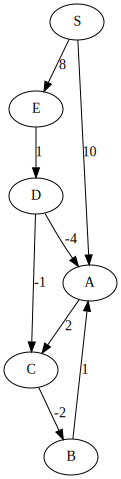

In [17]:
#G = G2
w = G.vertices[0]
dijkstra(w, G, True)

for v in G.vertices:
    print(v.value, v.estD)
# --

display_graph(G)

***

### <font color='red'> Section 2: Now that you understand Dijkstra in detail, can you modify this to print the shortest path from w to all other nodes. </font>

S:  ['S']
E:  ['E', 'S']
A:  ['A', 'D', 'E', 'S']
D:  ['D', 'E', 'S']
B:  ['B', 'C', 'A', 'D', 'E', 'S']
C:  ['C', 'A', 'D', 'E', 'S']

---------

B:  ['B', 'C', 'A', 'D', 'E', 'S']


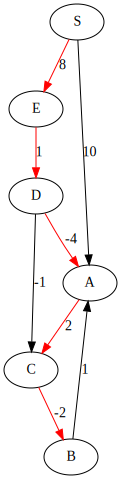


---------

S []
E ['S']
A ['D', 'E', 'S']
D ['E', 'S']
B ['C', 'A', 'D', 'E', 'S']
C ['A', 'D', 'E', 'S']

---------



In [18]:
### TODO ###
### Good Luck ###

w = G.vertices[0]
dijkstra(w, G)

for v in G.vertices:
    break
    if v.last:
        print(v.value, v.estD, v.last.value)
    else:
        print(v.value, v.estD)
# --

#display_graph(G)

def get_path(vert, path):
    if not vert.last:
        return
    # --
    path.append(vert.last)
    get_path(vert.last, path)
# --

def print_path(idx, G, show_graph=True):
    w = idx
    if isinstance(idx, int):
        w = G.vertices[idx]
    vert_path = [w]
    get_path(w, vert_path)
    print('{}: '.format(str(w)), [str(x) for x in vert_path])
    if show_graph:
        color_path = {str(x.last): [str(x),'red'] for x in vert_path}
        #print(color_path)
        #print([str(x) for x in vert_path])
        display(display_graph(G,color_path))
    return vert_path
# --

# All the paths
for v in G.vertices:
    print_path(v,G,False)
# --

print('\n---------\n')

# A nice path
print_path(4,G)


# Version 2 with added printing

print('\n---------\n')

dijkstra(w, G, True)

print('\n---------\n')


***

### <font color='red'> Section 3: Modify above code to do Bellman-Ford. Make sure you test for negative cycles and compare its performance with Dijkstra. </font>

In [19]:
#### TODO ####
### Good Luck ###

def bellman(w, G, print_ = False):
    if print_:
        return bellman_v2(w, G)
    
    for v in G.vertices:
        v.estD = math.inf
        v.last = None
    # --
    w.estD = 0
    
    for x in range(len(G.vertices) - 1):
        for u in G.vertices:
            for v, wt in u.getOutNeighborsWithWeights():
                if u.estD + wt < v.estD:
                    v.estD = u.estD + wt
                    v.last = u
                # --
            # --
        # --
    # --
    
    for v, u in G.getDirEdges():
        if u[0].estD + u[1] < v.estD:
            print('Negative Cycles')
            return None
    # --
    return
# --

def bellman_v2(w, G):
    
    for v in G.vertices:
        v.estD = math.inf
        v.last = None
    # --
    w.estD = 0
    
    shortest_paths = {}
    
    for x in range(len(G.vertices) - 1):
        for u in G.vertices:
            for v, wt in u.getOutNeighborsWithWeights():
                if u.estD + wt < v.estD:
                    v.estD = u.estD + wt
                    v.last = u
                # --
            # --
            v = u
            if not u in shortest_paths:
                shortest_paths[str(u)] = []
                while v.last:
                    shortest_paths[str(u)].append(v.last)
                    v = v.last
                # --
            # --
        # --
    # --
    
    for v, u in G.getDirEdges():
        if u[0].estD + u[1] < v.estD:
            print('Negative Cycles')
            #print(str(u[0]),v)
            #return None
            [print(x,[str(i) for i in shortest_paths[x]]) for x in shortest_paths]
            return shortest_paths
    # --
    
    [print(x,[str(i) for i in shortest_paths[x]]) for x in shortest_paths]
    return shortest_paths
# --





Negative Cycles
S []
E ['S']
A ['D', 'E', 'S']
D ['E', 'S']
B ['C', 'A', 'D', 'E', 'S']
C ['A', 'D', 'E', 'S']
B:  ['B', 'C', 'A', 'D', 'E', 'S']


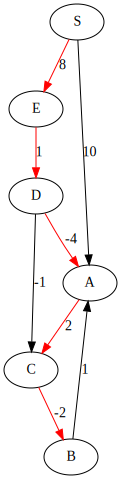

In [20]:
#G = G2

w = G.vertices[0]
bellman(w, G, True)

# A nice path
print_path(4,G)


***

### Section 4: Dynammc Programming

We discussed Fibonacci numbers sequence as a good example of Dynamic Programming. Let us have a look at its computation.

In [21]:
def Fibonacci(n):
    if n == 0 or n == 1:
        return 1
    return Fibonacci(n-1) + Fibonacci(n-2)
                

In [22]:
def fasterFibonacci(n):
    
    F = [1 for i in range(n+1)]

    for i in range(2,n+1):
        F[i] = F[i-1] + F[i-2]
        
    return F[n]

In [23]:

def Fibonacci_topdown(n,F):
    
    if n == 1 or n == 0:
        return n
    if F[n] != None:
        return F[n]
    
    F[n] = Fibonacci_topdown(n-1, F) + Fibonacci_topdown(n-2, F)
    return F[n]

Have a look at above different ways to compute Fibonacci numbers. Report on their running time. Make sure you know the difference between them.

***

In [24]:

test_number = 1

# - Test -
number = 30
start = process_time()

result = Fibonacci(number)
print(result)

end = process_time() - start
print('Test No. {}, Function: {}, Time: {}'.format(test_number, 'Fibonacci', end))
test_number += 1


# - Test -
number = 30
start = process_time()

result = fasterFibonacci(number)
print(result)

end = process_time() - start
print('Test No. {}, Function: {}, Time: {}'.format(test_number, 'fasterFibonacci', end))
test_number += 1


# - Test -
number = 30
start = process_time()

F = [None] * (number + 1)

result = Fibonacci_topdown(number,F)
print(result)

end = process_time() - start
print('Test No. {}, Function: {}, Time: {}'.format(test_number, 'Fibonacci_topdown', end))
test_number += 1



1346269
Test No. 1, Function: Fibonacci, Time: 0.359375
1346269
Test No. 2, Function: fasterFibonacci, Time: 0.0
832040
Test No. 3, Function: Fibonacci_topdown, Time: 0.0


***

### <font color='red'> Section 5: Implement Floyd-Warshal algorithm using above data structure (that is Node and Graph). Make sure to test all the use-cases. </font>

[[0, None], [8, 1], [5, 1], [9, 1], [5, 1], [7, 1]]
[[inf, None], [0, None], [-3, 3], [1, 3], [-3, 3], [-1, 3]]
[[inf, None], [inf, None], [0, None], [inf, None], [0, 5], [2, 5]]
[[inf, None], [inf, None], [-4, 2], [0, None], [-4, 2], [-2, 2]]
[[inf, None], [inf, None], [1, 2], [inf, None], [0, None], [3, 2]]
[[inf, None], [inf, None], [-1, 4], [inf, None], [-2, 4], [0, None]]

---------

[1, 3, 2, 5, 4]
S:  ['S', 'E', 'D', 'A', 'C']


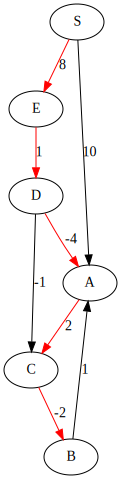

[4, 2]
C:  ['C', 'B']


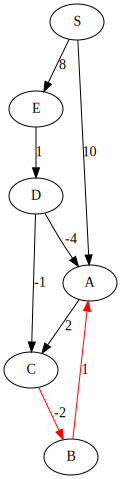

[1, 3, 2]
S:  ['S', 'E', 'D']


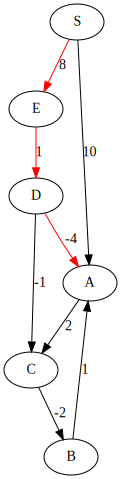

[0, 1, 3]

In [25]:
#### TODO ####
### Good Luck ###


def floyd(G, print_ = False):
    
    n_nodes = len(G.vertices)
    
    #dist = np.zeros((n_nodes, n_nodes))
    #dist2 = {str(x):{str(i):[math.inf,[]] for i in G.vertices} for x in G.vertices}
    dist = [[[math.inf,None] for i in G.vertices] for x in G.vertices]
    
    for idx, v in enumerate(G.vertices):
        v.estD = math.inf
        v.last = None
        #dist2[str(v)][str(v)][0] = 0
        v.last_paths = {}
        dist[idx][idx][0] = 0
        dist[idx][idx][1] = None
    # --
    
    for v, u in G.getDirEdges():
        #dist2[str(v)][str(u[0])][0] = u[1]
        dist[v.idx][u[0].idx][0] = u[1]
        dist[v.idx][u[0].idx][1] = u[0].idx
    # --
    
    for k in range(n_nodes):#for k_ in G.vertices:#for k in range(1,n_nodes):
        for i in range(n_nodes):#for i_ in G.vertices:#for i in range(1,n_nodes):
            for j in range(n_nodes):#for j_ in G.vertices:#for j in range(1,n_nodes):
                if dist[i][j][0] > dist[i][k][0] + dist[k][j][0]:
                    dist[i][j][0] = dist[i][k][0] + dist[k][j][0]
                    dist[i][j][1] = dist[i][k][1]
                    #k_.last_paths[k] = j_
    # --
    
    #[print(x,dist2[x]) for x in dist2]
    
    [print(x) for x in dist]
    
    return dist
# --




#w = G.vertices[0]
dist = floyd(G)

def get_path_idx(idx1, idx2, path, dist):
    if dist[dist[idx1][idx2][1]][idx2][1] == None:
        print([dist[x][idx2][1] for x in path])
        return
    # --
    path.append(dist[idx1][idx2][1])
    get_path_idx(dist[idx1][idx2][1], idx2, path, dist)
# --

def print_path_dist(idx1, idx2, G, dist, show_graph=True):
    w = idx1
    if isinstance(idx1, int):
        w = G.vertices[idx1]
    u = idx1
    if isinstance(idx2, int):
        u = G.vertices[idx2]
    vert_path = [w.idx]
    get_path_idx(idx1, idx2, vert_path, dist)
    print('{}: '.format(str(w)), [str(G.vertices[x]) for x in vert_path])
    if show_graph:
        color_path = {str(G.vertices[x]): [str(G.vertices[dist[x][idx2][1]]),'red'] for x in vert_path}
        #print(color_path)
        display(display_graph(G,color_path))
    return vert_path
# --

print('\n---------\n')
#path = []
#get_path(0,4,path,dist)
#print([str(G.vertices[x]) for x in path])

# A nice path
print_path_dist(0, 4, G, dist)

# A nice path 2
print_path_dist(5, 2, G, dist)

# A nice path 2
print_path_dist(0, 2, G, dist)







***

In [26]:
# --

def stair_run_rec(n):
    if n == 1 or n == 0:
        return 1
    elif n == 2:
        return 2
    else:
        total = stair_run_rec(n - 3) + stair_run_rec(n - 2) + stair_run_rec(n - 1)
        return total
# --


def stair_run(n, combos = [1,1,2]):
    combos = combos + [0] * (n + 1)
    
    for x in range(1, n + 1):#2#3
        if x != 1 or x != 0:
            combos[x] = combos[x - 3] + combos[x - 2] + combos[x - 1]
    # --
    return combos[n]
# --

ways = stair_run_rec(25)
print(ways)

combos = []
ways = stair_run(25)
print(ways)


2555757
2555757


***

In [27]:
# INSANITY
'''
def stair_run(n, combos=[], current=0, ways=0, current_combo=[]):
    if current < n:
        if n - current >= 3:
            temp = current_combo.copy()
            temp.append(3)
            #current += 1
            ways, combos, dwd = stair_run(n, combos, current + 3, ways + 1, temp)
            combos.append(dwd)
        elif n - current >= 2:
            temp = current_combo.copy()
            temp.append(2)
            #current += 2
            ways, combos, dwd = stair_run(n, combos, current + 2, ways + 1, temp)
            combos.append(dwd)
        elif n - current >= 1:
            temp = current_combo.copy()
            temp.append(1)
            #current += 3
            ways, combos, dwd = stair_run(n, combos, current + 1, ways + 1, temp)
            combos.append(dwd)
    # --
    #combos.append(current_combo)
    return ways, combos, current_combo
# --



possible_ways, combos, qeg = stair_run(3)
print(possible_ways)
print(combos)
print(qeg)
'''

'\ndef stair_run(n, combos=[], current=0, ways=0, current_combo=[]):\n    if current < n:\n        if n - current >= 3:\n            temp = current_combo.copy()\n            temp.append(3)\n            #current += 1\n            ways, combos, dwd = stair_run(n, combos, current + 3, ways + 1, temp)\n            combos.append(dwd)\n        elif n - current >= 2:\n            temp = current_combo.copy()\n            temp.append(2)\n            #current += 2\n            ways, combos, dwd = stair_run(n, combos, current + 2, ways + 1, temp)\n            combos.append(dwd)\n        elif n - current >= 1:\n            temp = current_combo.copy()\n            temp.append(1)\n            #current += 3\n            ways, combos, dwd = stair_run(n, combos, current + 1, ways + 1, temp)\n            combos.append(dwd)\n    # --\n    #combos.append(current_combo)\n    return ways, combos, current_combo\n# --\n\n\n\npossible_ways, combos, qeg = stair_run(3)\nprint(possible_ways)\nprint(combos)\nprint